In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from tensorflow.keras.optimizers import Adam

In [2]:
IMAGE_WIDTH= 48
IMAGE_HEIGHT= 48
IMAGE_CHANNELS= 1
IMAGE_SIZE= (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
BATCH_SIZE = 32
EPOCHS = 20
optimizer = Adam(learning_rate=0.001)
earlystop = EarlyStopping(patience=5)
path_test = '../data/images/test'

In [3]:
def get_image_path(id):
    return os.path.join(path_test, f"{id}.jpg")

In [4]:
def procesar_imagen(path):
        img = cv2.imread(path, 0)
        img_scale = np.array(img) / 255.0
        return img_scale

In [5]:
train = pd.read_csv('./train_set.csv')
test = pd.read_csv('./test_set.csv')
sample = pd.read_csv('./sample_submision.csv')

In [6]:
test['path'] = test['id_img'].apply(get_image_path)

In [7]:
ruta_imagen = train.loc[0, 'path']
ruta_imagen

'../data/images/train/angry\\0.jpg'

In [8]:
train['Imagenes'] = train['path'].apply(procesar_imagen)

In [9]:
test['Imagenes'] = test['path'].apply(procesar_imagen)

In [10]:
train

,id_img,path,label,Imagenes
0,0,../data/images/train/angry\0.jpg,angry,"[[0.2823529411764706, 0.3058823529411765, 0.31..."
1,1,../data/images/train/angry\1.jpg,angry,"[[0.596078431372549, 0.5843137254901961, 0.576..."
2,10,../data/images/train/angry\10.jpg,angry,"[[0.11372549019607843, 0.09803921568627451, 0...."
3,10002,../data/images/train/angry\10002.jpg,angry,"[[0.12549019607843137, 0.09019607843137255, 0...."
4,10016,../data/images/train/angry\10016.jpg,angry,"[[0.8705882352941177, 0.8549019607843137, 0.79..."
...,...,...,...,...
28816,9969,../data/images/train/surprise\9969.jpg,surprise,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00..."
28817,9985,../data/images/train/surprise\9985.jpg,surprise,"[[0.5098039215686274, 0.5254901960784314, 0.51..."
28818,9990,../data/images/train/surprise\9990.jpg,surprise,"[[0.9529411764705882, 0.8627450980392157, 0.81..."
28819,9992,../data/images/train/surprise\9992.jpg,surprise,"[[0.9921568627450981, 0.9882352941176471, 0.99..."


In [58]:
test

,id_img,path,Imagenes
0,10052,../data/images/test\10052.jpg,"[[0.22745098039215686, 0.25882352941176473, 0...."
1,10065,../data/images/test\10065.jpg,"[[0.09019607843137255, 0.10196078431372549, 0...."
2,10079,../data/images/test\10079.jpg,"[[0.788235294117647, 0.7137254901960784, 0.713..."
3,10095,../data/images/test\10095.jpg,"[[0.36470588235294116, 0.33725490196078434, 0...."
4,10121,../data/images/test\10121.jpg,"[[0.043137254901960784, 0.023529411764705882, ..."
...,...,...,...
7061,9806,../data/images/test\9806.jpg,"[[1.0, 0.9921568627450981, 1.0, 1.0, 0.9921568..."
7062,9830,../data/images/test\9830.jpg,"[[0.32941176470588235, 0.2784313725490196, 0.2..."
7063,9853,../data/images/test\9853.jpg,"[[0.9803921568627451, 0.9921568627450981, 0.99..."
7064,9878,../data/images/test\9878.jpg,"[[0.8941176470588236, 0.8784313725490196, 0.89..."


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['label_encoded'] = label_encoder.fit_transform(train['label'])

In [12]:
train['label_encoded'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [13]:
train [train['label_encoded']== 6]

,id_img,path,label,Imagenes,label_encoded
25616,10007,../data/images/train/surprise\10007.jpg,surprise,"[[0.47843137254901963, 0.592156862745098, 0.63...",6
25617,10009,../data/images/train/surprise\10009.jpg,surprise,"[[0.6941176470588235, 0.3568627450980392, 0.42...",6
25618,10011,../data/images/train/surprise\10011.jpg,surprise,"[[0.788235294117647, 0.4196078431372549, 0.247...",6
25619,10013,../data/images/train/surprise\10013.jpg,surprise,"[[1.0, 1.0, 1.0, 0.9882352941176471, 0.9960784...",6
25620,10061,../data/images/train/surprise\10061.jpg,surprise,"[[0.9490196078431372, 0.7568627450980392, 0.41...",6
...,...,...,...,...,...
28816,9969,../data/images/train/surprise\9969.jpg,surprise,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00...",6
28817,9985,../data/images/train/surprise\9985.jpg,surprise,"[[0.5098039215686274, 0.5254901960784314, 0.51...",6
28818,9990,../data/images/train/surprise\9990.jpg,surprise,"[[0.9529411764705882, 0.8627450980392157, 0.81...",6
28819,9992,../data/images/train/surprise\9992.jpg,surprise,"[[0.9921568627450981, 0.9882352941176471, 0.99...",6


In [14]:
train = train.sample(frac=1).reset_index(drop=True)

In [15]:
train

,id_img,path,label,Imagenes,label_encoded
0,16538,../data/images/train/surprise\16538.jpg,surprise,"[[0.3803921568627451, 0.3764705882352941, 0.34...",6
1,14860,../data/images/train/fear\14860.jpg,fear,"[[0.49019607843137253, 0.44313725490196076, 0....",2
2,24276,../data/images/train/sad\24276.jpg,sad,"[[0.21568627450980393, 0.2196078431372549, 0.2...",5
3,29449,../data/images/train/neutral\29449.jpg,neutral,"[[0.12156862745098039, 0.3333333333333333, 0.2...",4
4,24818,../data/images/train/sad\24818.jpg,sad,"[[0.8588235294117647, 0.8666666666666667, 0.89...",5
...,...,...,...,...,...
28816,7062,../data/images/train/happy\7062.jpg,happy,"[[0.7098039215686275, 0.6705882352941176, 0.67...",3
28817,20099,../data/images/train/fear\20099.jpg,fear,"[[1.0, 0.9686274509803922, 0.9725490196078431,...",2
28818,18738,../data/images/train/sad\18738.jpg,sad,"[[0.17647058823529413, 0.21568627450980393, 0....",5
28819,154,../data/images/train/sad\154.jpg,sad,"[[0.19215686274509805, 0.2901960784313726, 0.3...",5


In [16]:
train['label'].value_counts(normalize=True)

label
happy       0.248569
neutral     0.172860
sad         0.171333
fear        0.142361
angry       0.138545
surprise    0.111204
disgust     0.015128
Name: proportion, dtype: float64

In [17]:
train['label'].value_counts()

label
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3993
surprise    3205
disgust      436
Name: count, dtype: int64

In [18]:
X_train = np.stack(train['Imagenes'].values)
y_train = np.array(train['label_encoded'])
X_test = np.stack(test['Imagenes'].values)

In [19]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)

(28821, 48, 48)
(28821,)
(7066, 48, 48)


In [20]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [21]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)

(28821, 48, 48, 1)
(28821,)
(7066, 48, 48, 1)


In [22]:
# model = keras.Sequential([
#     keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(IMAGE_SIZE)),
#     keras.layers.MaxPooling2D(2,2),
#     keras.layers.Conv2D(32, (3,3), activation="relu"),
#     keras.layers.MaxPooling2D(2,2),
#     keras.layers.Flatten(),
#     keras.layers.Dense(64, activation="relu"),
#     keras.layers.Dense(16, activation="relu"),
#     keras.layers.Dense(7, activation="softmax")
# ])

In [23]:
# model.compile(optimizer='adam',
#               loss="sparse_categorical_crossentropy",
#               metrics=['accuracy'])

In [24]:
# history = model.fit(X_train,
#                     y_train,
#                     batch_size=BATCH_SIZE,
#                     epochs=EPOCHS,
#                     validation_split=0.2)

In [25]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(IMAGE_SIZE)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(7, activation="softmax")
    
])

model_2.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [26]:
history_2 = model_2.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=7,
                    callbacks = earlystop,
                    validation_split=0.2)

Epoch 1/7


721/721 [==============================] - 9s 12ms/step - loss: 1.7066 - accuracy: 0.3168 - val_loss: 1.5995 - val_accuracy: 0.3717
Epoch 2/7
721/721 [==============================] - 9s 12ms/step - loss: 1.4961 - accuracy: 0.4261 - val_loss: 1.4669 - val_accuracy: 0.4286
Epoch 3/7
721/721 [==============================] - 9s 12ms/step - loss: 1.3989 - accuracy: 0.4635 - val_loss: 1.4154 - val_accuracy: 0.4500
Epoch 4/7
721/721 [==============================] - 9s 12ms/step - loss: 1.3327 - accuracy: 0.4864 - val_loss: 1.4147 - val_accuracy: 0.4676
Epoch 5/7
721/721 [==============================] - 9s 12ms/step - loss: 1.2832 - accuracy: 0.5081 - val_loss: 1.3628 - val_accuracy: 0.4814
Epoch 6/7
721/721 [==============================] - 9s 12ms/step - loss: 1.2403 - accuracy: 0.5262 - val_loss: 1.3513 - val_accuracy: 0.4834
Epoch 7/7
721/721 [==============================] - 9s 12ms/step - loss: 1.1996 - accuracy: 0.5421 - val_loss: 1.3786 - val_accuracy: 0.4756


In [27]:
history_2 = model_2.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=3,
                    callbacks = earlystop,
                    validation_split=0.2)

Epoch 1/3
721/721 [==============================] - 9s 12ms/step - loss: 1.1643 - accuracy: 0.5553 - val_loss: 1.3438 - val_accuracy: 0.4888
Epoch 2/3
721/721 [==============================] - 9s 12ms/step - loss: 1.1273 - accuracy: 0.5708 - val_loss: 1.3391 - val_accuracy: 0.4984
Epoch 3/3
721/721 [==============================] - 9s 12ms/step - loss: 1.0979 - accuracy: 0.5825 - val_loss: 1.3736 - val_accuracy: 0.4945


In [28]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

In [29]:
best_epoch = val_loss.index(min(val_loss)) + 1

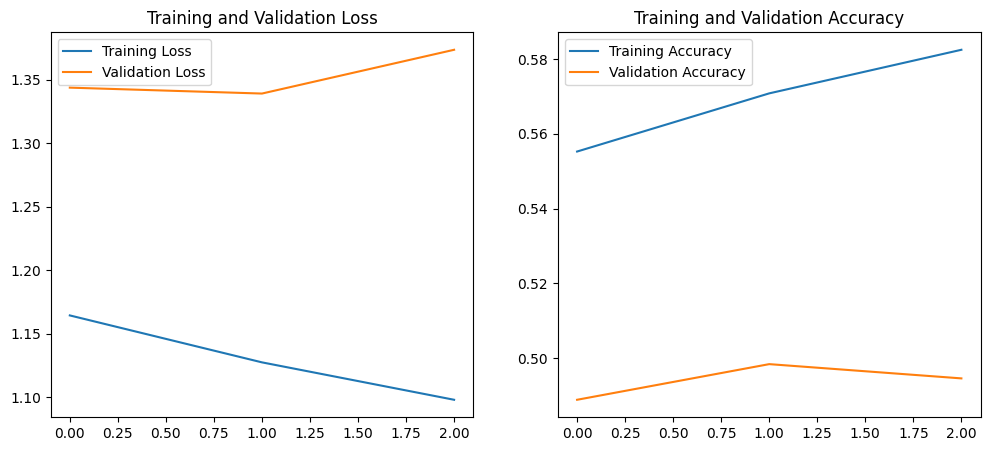

In [30]:
# Acceder a los datos del historial
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
accuracy = history_2.history['accuracy']  # Cambia 'accuracy' por la métrica que usaste
val_accuracy = history_2.history['val_accuracy']  # Ídem

# Crear gráficos para pérdida y precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [31]:
y_pred_2 = model_2.predict(X_test)

221/221 [==============================] - 1s 3ms/step


In [32]:
# layers = [
#     keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=IMAGE_SIZE),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
#     keras.layers.Conv2D(64, (3,3), activation='relu'),
#     keras.layers.MaxPooling2D(pool_size=(2,2)),
    
#     keras.layers.Flatten(),
    
#     keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     keras.layers.Dropout(0.5),
    
#     keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
#     keras.layers.Dropout(0.5),
    
#     keras.layers.Dense(7, activation='softmax')
# ]

# model_3 = keras.Sequential(layers)
# model_3.compile(optimizer=optimizer,
#                 loss='sparse_categorical_crossentropy',
#                 metrics=['accuracy'])

In [33]:
# history_3 = model_3.fit(X_train,
#                     y_train,
#                     batch_size=BATCH_SIZE,
#                     epochs=9,
#                     callbacks = earlystop,
#                     validation_split=0.2)

In [34]:
# loss_2 = history_3.history['loss']
# val_loss_2 = history_3.history['val_loss']

In [35]:
# best_epoch = val_loss_2.index(min(val_loss_2)) + 1

In [36]:
# y_pred_3 = model_3.predict(X_test)

In [37]:
y_pred_2[0]

array([0.09929428, 0.00097464, 0.06120787, 0.16931038, 0.53212386,
       0.13398148, 0.00310754], dtype=float32)

In [38]:
pred_labels2 = np.argmax(y_pred_2, axis=1)
pred_labels2

array([4, 2, 4, ..., 0, 4, 2], dtype=int64)

In [39]:
submi_2 = label_encoder.inverse_transform(pred_labels2)
pred_labels2 = np.argmax(y_pred_2, axis=1)
pred_labels2
submission_1 = pd.DataFrame({'id_img': test['id_img'].values, 'label': submi_2})

In [40]:
submission_1 = pd.DataFrame({'id_img': test['id_img'].values, 'label': submi_2})

In [41]:
submission_1

,id_img,label
0,10052,neutral
1,10065,fear
2,10079,neutral
3,10095,sad
4,10121,angry
...,...,...
7061,9806,surprise
7062,9830,neutral
7063,9853,angry
7064,9878,neutral


In [42]:
submission_1.to_csv('submission_3.csv', index=False)

In [43]:
# submission_2.to_csv('submission_2.csv', index=False)
# # ESTE VALE MIERDA

In [44]:
optimizer = Adam(learning_rate=0.0005) 

In [47]:
from sklearn.utils.class_weight import compute_class_weight
class_labels = np.unique(y_train)
pesos_personalizados = {
    3: 0.5,      # Menor peso para 'happy'
    4: 1.0,    # Peso estándar para 'neutral'
    5: 1.0,        # Peso estándar para 'sad'
    2: 1.5,       # Peso mayor para 'fear'
    0: 1.5,      # Peso mayor para 'angry'
    6: 2.0,   # Peso aún mayor para 'surprise'
    1: 3.0     # El mayor peso para 'disgust'
}

class_weight_dict = {label: pesos_personalizados[label] for label in class_labels}

# class_weights = compute_class_weight(class_weight_dict, classes=class_labels, y=y_train)

In [46]:
model_4 = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(IMAGE_SIZE)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(7, activation="softmax")
    
])

model_4.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [48]:
history_4 = model_4.fit(X_train,
                    y_train,
                    class_weight=class_weight_dict,
                    batch_size=BATCH_SIZE,
                    epochs=20,
                    callbacks = earlystop,
                    validation_split=0.2)

Epoch 1/17
721/721 [==============================] - 10s 13ms/step - loss: 2.1146 - accuracy: 0.1792 - val_loss: 1.7797 - val_accuracy: 0.2357
Epoch 2/17
721/721 [==============================] - 9s 12ms/step - loss: 1.9473 - accuracy: 0.2812 - val_loss: 1.7214 - val_accuracy: 0.2883
Epoch 3/17
721/721 [==============================] - 9s 12ms/step - loss: 1.8609 - accuracy: 0.3499 - val_loss: 1.5703 - val_accuracy: 0.3957
Epoch 4/17
721/721 [==============================] - 9s 12ms/step - loss: 1.7962 - accuracy: 0.3883 - val_loss: 1.5854 - val_accuracy: 0.3941
Epoch 5/17
721/721 [==============================] - 9s 12ms/step - loss: 1.7274 - accuracy: 0.4188 - val_loss: 1.5028 - val_accuracy: 0.4337
Epoch 6/17
721/721 [==============================] - 9s 12ms/step - loss: 1.6670 - accuracy: 0.4421 - val_loss: 1.4596 - val_accuracy: 0.4479
Epoch 7/17
721/721 [==============================] - 9s 12ms/step - loss: 1.6226 - accuracy: 0.4575 - val_loss: 1.4465 - val_accuracy: 0.459

In [49]:
history_4 = model_4.fit(X_train,
                    y_train,
                    class_weight=class_weight_dict,
                    batch_size=BATCH_SIZE,
                    epochs=20,
                    callbacks = earlystop,
                    validation_split=0.2)

Epoch 1/20
721/721 [==============================] - 9s 13ms/step - loss: 1.2123 - accuracy: 0.5796 - val_loss: 1.4013 - val_accuracy: 0.4817
Epoch 2/20
721/721 [==============================] - 9s 12ms/step - loss: 1.1894 - accuracy: 0.5924 - val_loss: 1.3923 - val_accuracy: 0.4895
Epoch 3/20
721/721 [==============================] - 9s 12ms/step - loss: 1.1556 - accuracy: 0.5995 - val_loss: 1.4465 - val_accuracy: 0.4838
Epoch 4/20
721/721 [==============================] - 9s 12ms/step - loss: 1.1189 - accuracy: 0.6111 - val_loss: 1.4372 - val_accuracy: 0.4862
Epoch 5/20
721/721 [==============================] - 9s 13ms/step - loss: 1.0930 - accuracy: 0.6213 - val_loss: 1.5061 - val_accuracy: 0.4770
Epoch 6/20
721/721 [==============================] - 9s 12ms/step - loss: 1.0649 - accuracy: 0.6266 - val_loss: 1.4921 - val_accuracy: 0.4761
Epoch 7/20
721/721 [==============================] - 10s 14ms/step - loss: 1.0419 - accuracy: 0.6337 - val_loss: 1.5527 - val_accuracy: 0.468

In [51]:
y_pred = model_4.predict(X_test)

221/221 [==============================] - 1s 3ms/step


In [52]:
pred_labels = np.argmax(y_pred, axis=1)
pred_labels
submi = label_encoder.inverse_transform(pred_labels)

submission = pd.DataFrame({'id_img': test['id_img'].values, 'label': submi_2})
submission.to_csv('submission_4.csv', index=False)

In [53]:
model_5 = keras.Sequential([
    # Primera capa convolucional
    keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=IMAGE_SIZE),
    keras.layers.MaxPooling2D(2, 2),

    # Segunda capa convolucional
    keras.layers.Conv2D(128, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(2, 2),

    # Tercera capa convolucional
    keras.layers.Conv2D(256, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(2, 2),

    # Aplanar los resultados para alimentar una DNN
    keras.layers.Flatten(),

    # Capa densa con regularización
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),

    # Segunda capa densa
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),

    # Capa de salida
    keras.layers.Dense(7, activation="softmax")
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model_5.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [54]:
history = model_5.fit(X_train,
                    y_train,
                    class_weight=class_weight_dict,
                    batch_size=BATCH_SIZE,
                    epochs=20,
                    callbacks = earlystop,
                    validation_split=0.2)

Epoch 1/20
721/721 [==============================] - 21s 29ms/step - loss: 2.0802 - accuracy: 0.1849 - val_loss: 1.7432 - val_accuracy: 0.2397
Epoch 2/20
721/721 [==============================] - 20s 28ms/step - loss: 1.8658 - accuracy: 0.3248 - val_loss: 1.4898 - val_accuracy: 0.4250
Epoch 3/20
721/721 [==============================] - 20s 28ms/step - loss: 1.7038 - accuracy: 0.4297 - val_loss: 1.4397 - val_accuracy: 0.4402
Epoch 4/20
721/721 [==============================] - 21s 29ms/step - loss: 1.5953 - accuracy: 0.4677 - val_loss: 1.3422 - val_accuracy: 0.4904
Epoch 5/20
721/721 [==============================] - 20s 28ms/step - loss: 1.4954 - accuracy: 0.5100 - val_loss: 1.2999 - val_accuracy: 0.5008
Epoch 6/20
721/721 [==============================] - 20s 28ms/step - loss: 1.4091 - accuracy: 0.5366 - val_loss: 1.3015 - val_accuracy: 0.5131
Epoch 7/20
721/721 [==============================] - 21s 28ms/step - loss: 1.3368 - accuracy: 0.5641 - val_loss: 1.2673 - val_accuracy:

In [57]:
y_pred = model_5.predict(X_test)
pred_labels = np.argmax(y_pred, axis=1)
pred_labels
submi = label_encoder.inverse_transform(pred_labels)

submission = pd.DataFrame({'id_img': test['id_img'].values, 'label': submi})
submission.to_csv('submission_5.csv', index=False)

221/221 [==============================] - 2s 8ms/step


In [62]:
model_6 = keras.Sequential([
    # Primera capa convolucional
    keras.layers.Conv2D(64, (3, 3), input_shape=IMAGE_SIZE),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(2, 2),

    # Segunda capa convolucional
    keras.layers.Conv2D(128, (3, 3)),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(2, 2),

    # Tercera capa convolucional
    keras.layers.Conv2D(256, (3, 3)),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(2, 2),

    # Aplanar los resultados para alimentar una DNN
    keras.layers.Flatten(),

    # Capa densa con regularización
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),

    # Segunda capa densa
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),

    # Capa de salida
    keras.layers.Dense(7, activation="softmax")
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model_6.compile(optimizer=optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])


In [63]:
history = model_6.fit(X_train,
                    y_train,
                    class_weight=class_weight_dict,
                    batch_size=BATCH_SIZE,
                    epochs=20,
                    callbacks = earlystop,
                    validation_split=0.2)

Epoch 1/20
721/721 [==============================] - 27s 37ms/step - loss: 2.1106 - accuracy: 0.1798 - val_loss: 1.7642 - val_accuracy: 0.2328
Epoch 2/20
721/721 [==============================] - 27s 37ms/step - loss: 1.9200 - accuracy: 0.2800 - val_loss: 1.5948 - val_accuracy: 0.3873
Epoch 3/20
721/721 [==============================] - 27s 37ms/step - loss: 1.7908 - accuracy: 0.3854 - val_loss: 1.5302 - val_accuracy: 0.4180
Epoch 4/20
721/721 [==============================] - 26s 36ms/step - loss: 1.6838 - accuracy: 0.4420 - val_loss: 1.4103 - val_accuracy: 0.4600
Epoch 5/20
721/721 [==============================] - 27s 37ms/step - loss: 1.5938 - accuracy: 0.4678 - val_loss: 1.3937 - val_accuracy: 0.4742
Epoch 6/20
721/721 [==============================] - 26s 37ms/step - loss: 1.5152 - accuracy: 0.5024 - val_loss: 1.2758 - val_accuracy: 0.5030
Epoch 7/20
721/721 [==============================] - 26s 37ms/step - loss: 1.4385 - accuracy: 0.5270 - val_loss: 1.2935 - val_accuracy:

In [60]:
y_pred = model_6.predict(X_test)
pred_labels = np.argmax(y_pred, axis=1)
pred_labels
submi = label_encoder.inverse_transform(pred_labels)

submission = pd.DataFrame({'id_img': test['id_img'].values, 'label': submi})
submission.to_csv('submission_5.csv', index=False)

221/221 [==============================] - 3s 15ms/step


In [64]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de entrenamiento original en un nuevo conjunto de entrenamiento y un conjunto de validación
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de datos con data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,       # rotaciones aleatorias
    width_shift_range=0.2,   # desplazamiento horizontal
    height_shift_range=0.2,  # desplazamiento vertical
    shear_range=0.2,         # cizallamiento
    zoom_range=0.2,          # zoom
    horizontal_flip=True,    # volteo horizontal
    fill_mode='nearest'      # modo de llenado para nuevas píxeles
)

# El generador de validación no debe tener data augmentation, solo normalización
validation_datagen = ImageDataGenerator()

# Aplicar el generador a los datos de entrenamiento
train_generator = train_datagen.flow(
    X_train, y_train, 
    batch_size=BATCH_SIZE
)

# Aplicar el generador de validación a los datos de validación
validation_generator = validation_datagen.flow(
    X_val, y_val, 
    batch_size=BATCH_SIZE
)


In [66]:
model_7 = keras.Sequential([
    # Primera capa convolucional
    keras.layers.Conv2D(64, (3, 3), input_shape=IMAGE_SIZE),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(2, 2),

    # Segunda capa convolucional
    keras.layers.Conv2D(128, (3, 3)),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(2, 2),

    # Tercera capa convolucional
    keras.layers.Conv2D(256, (3, 3)),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(2, 2),

    # Aplanar los resultados para alimentar una DNN
    keras.layers.Flatten(),

    # Capa densa con regularización
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),

    # Segunda capa densa
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),

    # Capa de salida
    keras.layers.Dense(7, activation="softmax")
])

optimizer = keras.optimizers.Adam(learning_rate=0.0005)

model_7.compile(optimizer=optimizer,
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])


In [67]:
history = model_7.fit(
    train_generator,
    steps_per_epoch=len(X_train) // BATCH_SIZE,  # Número de lotes por época
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(X_val) // BATCH_SIZE,  # Número de lotes de validación
    class_weight=class_weight_dict,
    callbacks=[earlystop]
)


Epoch 1/20
900/900 [==============================] - 38s 41ms/step - loss: 2.1538 - accuracy: 0.1628 - val_loss: 1.8449 - val_accuracy: 0.1946
Epoch 2/20
900/900 [==============================] - 36s 40ms/step - loss: 2.0696 - accuracy: 0.2017 - val_loss: 1.8108 - val_accuracy: 0.2290
Epoch 3/20
900/900 [==============================] - 36s 40ms/step - loss: 1.9934 - accuracy: 0.2170 - val_loss: 1.7625 - val_accuracy: 0.2609
Epoch 4/20
900/900 [==============================] - 36s 40ms/step - loss: 1.9606 - accuracy: 0.2346 - val_loss: 1.7941 - val_accuracy: 0.2717
Epoch 5/20
900/900 [==============================] - 35s 38ms/step - loss: 1.9285 - accuracy: 0.2575 - val_loss: 1.7024 - val_accuracy: 0.3043
Epoch 6/20
900/900 [==============================] - 38s 42ms/step - loss: 1.8952 - accuracy: 0.2742 - val_loss: 1.6827 - val_accuracy: 0.3271
Epoch 7/20
900/900 [==============================] - 36s 40ms/step - loss: 1.8715 - accuracy: 0.2955 - val_loss: 1.7191 - val_accuracy:

In [68]:
history = model_7.fit(
    train_generator,
    steps_per_epoch=len(X_train) // BATCH_SIZE,  # Número de lotes por época
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(X_val) // BATCH_SIZE,  # Número de lotes de validación
    class_weight=class_weight_dict,
    callbacks=[earlystop]
)


Epoch 1/20
900/900 [==============================] - 36s 40ms/step - loss: 1.5747 - accuracy: 0.4894 - val_loss: 1.1442 - val_accuracy: 0.5729
Epoch 2/20
900/900 [==============================] - 34s 38ms/step - loss: 1.5646 - accuracy: 0.4923 - val_loss: 1.2005 - val_accuracy: 0.5547
Epoch 3/20
900/900 [==============================] - 31s 35ms/step - loss: 1.5649 - accuracy: 0.4947 - val_loss: 1.1971 - val_accuracy: 0.5495
Epoch 4/20
900/900 [==============================] - 33s 37ms/step - loss: 1.5467 - accuracy: 0.4959 - val_loss: 1.1349 - val_accuracy: 0.5769
Epoch 5/20
900/900 [==============================] - 32s 36ms/step - loss: 1.5408 - accuracy: 0.5004 - val_loss: 1.1383 - val_accuracy: 0.5701
Epoch 6/20
900/900 [==============================] - 36s 39ms/step - loss: 1.5368 - accuracy: 0.5027 - val_loss: 1.1648 - val_accuracy: 0.5663
Epoch 7/20
900/900 [==============================] - 35s 39ms/step - loss: 1.5231 - accuracy: 0.5065 - val_loss: 1.1457 - val_accuracy:

In [69]:
history = model_7.fit(
    train_generator,
    steps_per_epoch=len(X_train) // BATCH_SIZE,  # Número de lotes por época
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(X_val) // BATCH_SIZE,  # Número de lotes de validación
    class_weight=class_weight_dict,
    callbacks=[earlystop]
)


Epoch 1/20
900/900 [==============================] - 35s 39ms/step - loss: 1.4536 - accuracy: 0.5292 - val_loss: 1.0684 - val_accuracy: 0.6005
Epoch 2/20
900/900 [==============================] - 36s 40ms/step - loss: 1.4558 - accuracy: 0.5334 - val_loss: 1.0521 - val_accuracy: 0.6083
Epoch 3/20
900/900 [==============================] - 34s 38ms/step - loss: 1.4522 - accuracy: 0.5324 - val_loss: 1.0581 - val_accuracy: 0.5990
Epoch 4/20
900/900 [==============================] - 36s 40ms/step - loss: 1.4459 - accuracy: 0.5343 - val_loss: 1.0393 - val_accuracy: 0.6066
Epoch 5/20
900/900 [==============================] - 35s 39ms/step - loss: 1.4412 - accuracy: 0.5387 - val_loss: 1.0552 - val_accuracy: 0.6017
Epoch 6/20
900/900 [==============================] - 35s 39ms/step - loss: 1.4338 - accuracy: 0.5387 - val_loss: 1.1282 - val_accuracy: 0.5809
Epoch 7/20
900/900 [==============================] - 34s 38ms/step - loss: 1.4248 - accuracy: 0.5429 - val_loss: 1.0655 - val_accuracy:

In [70]:
y_pred = model_7.predict(X_test)
pred_labels = np.argmax(y_pred, axis=1)
pred_labels
submi = label_encoder.inverse_transform(pred_labels)

submission = pd.DataFrame({'id_img': test['id_img'].values, 'label': submi})
submission.to_csv('submission_6.csv', index=False)

221/221 [==============================] - 2s 10ms/step
